In [1]:
%pylab inline
from itertools import cycle
from random import randrange

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

        
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def simulateWalk(step_set, walk_size, origin):
    steps = np.random.uniform(low=step_set[0],high=step_set[1], size=walk_size)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1] #first
    stop = path[-1:] #last
    return steps, path, start, stop
   
    
def plotWalk(step_n, path, start, stop, steps, dims):
    fig = plt.figure(figsize=(8,4),dpi=200)
    ax = fig.add_subplot(111)
    
    if(dims==1):     
        ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
        ax.plot(path,c='blue',alpha=0.5,lw=0.5,ls='-');
        ax.plot(0, start, c='red', marker='+')
        ax.plot(step_n, stop, c='black', marker='o')
        
    if(dims==2):
        ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
        ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-');
        ax.plot(start[:,0], start[:,1],c='red', marker='+')
        ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
    
    plt.title(str(dims) + 'D Random Walk ' + str(step_n) + ' steps')
    plt.tight_layout(pad=0)

def randomWalk(step_n,dims):
    step_set = [-1/2, 1/2]
    
    origin = np.zeros((1,dims))     
    walk_size = (step_n,dims)
    #simula caminhada
    steps, path, start, stop = simulateWalk(step_set, walk_size, origin)  
    #plota caminhada
    plotWalk(step_n, path, start, stop, steps, dims)
    
    
def finalRandomWalk():
    ten=10
    one=1
    step_set = [-1/2, 1/2]
    dims=2
    w=100000
    #pontos
    finals=np.zeros((w,dims))
    finals_one=np.zeros((w,dims))#finals with just one step
    origin = np.zeros((1,dims))
    
    walk_size = (ten,dims)
    walk_size_one = (one,dims)
    
    
    
    for i in range(w):
        #simula caminhada
        steps, path, start, finals[i:i+1] = simulateWalk(step_set, walk_size, origin)
        steps, path, start, finals_one[i:i+1] = simulateWalk(step_set, walk_size_one, origin)

     
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.scatter(finals[:,0], finals[:,1],s=0.5 ,c="orange", alpha=0.5, marker='o')
    plt.scatter(finals_one[:,0], finals_one[:,1],s=0.5 ,c="black", alpha=0.8)
    plt.title('10000 random walks finals with 1 and 10 steps')
    plt.tight_layout(pad=0)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()    
    
def variance(vet):
    mean=vet.mean()
    soma = 0
    for i in range(len(vet)):
        soma = soma + (vet[i]-mean)*(vet[i]-mean)
    return soma/(len(vet)-1)


def plotHist(finals, x, y,n):
# def plotHist(finals):
    
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.hist(finals, bins=50, density=True,edgecolor='black',zorder=1)
    plt.title('Histogram with N = ' + str(n) + ' steps')
    plt.tight_layout(pad=0)
    plt.xlabel("final walks")
    plt.ylabel("number of samples")
    plt.scatter(x, y,s=0.5 ,c="orange", alpha=0.5, marker='o',zorder=2)
    plt.show() 
    

def rmsCalculo(w,dims,origin,step_set):
    finals=np.zeros((w,dims))
    walk_size = (1,dims)
    step_set = [-1/2, 1/2]
    for i in range(w):
        steps, path, start, finals[i] = simulateWalk(step_set, walk_size, origin)
        
    return sqrt(variance(finals))
    
    
def Histogram(n):    
    step_set = [-1/2, 1/2]
    dims=1
    w=10000
    
    #pontos
    finals=np.zeros((w,dims))
    origin = np.zeros((1,dims))
    
    #tamanhos 1,2,3,5 caminhadas
    walk_size = (n,dims)
    
    for i in range(w):
        steps, path, start, finals[i] = simulateWalk(step_set, walk_size, origin)
        
    
    rms = rmsCalculo(w,dims,origin,step_set)
    
    sigma = sqrt(n)*rms 
    
    interval = (-3*sigma,3*sigma)
    
    x=np.arange(start=float(interval[0]), stop=float(interval[1]), step=float(interval[1]/w))
    y=np.zeros(len(x))
    
    for i in range(len(x)):
        inferior_e=2*(sigma**2)
        e=np.exp(-(x[i]**2)/inferior_e)
        inferior=sqrt(2*np.pi)*sigma
        y[i] = e/inferior
        
    plotHist(finals,x,y,n)
#     plotHist(finals)
     
    
    
    

Simulação para 1 dimensão

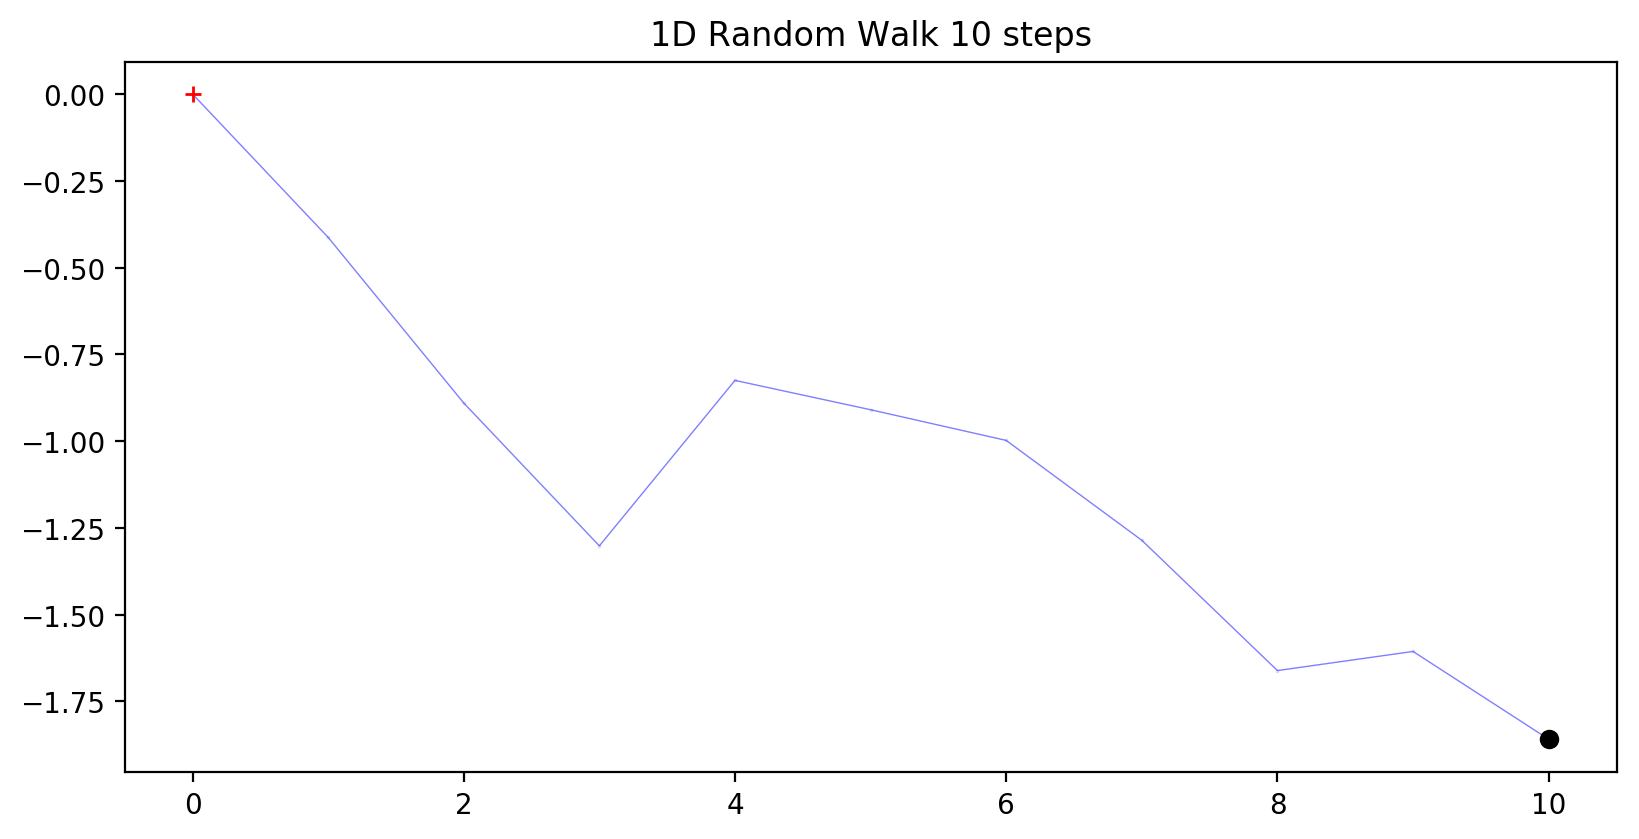

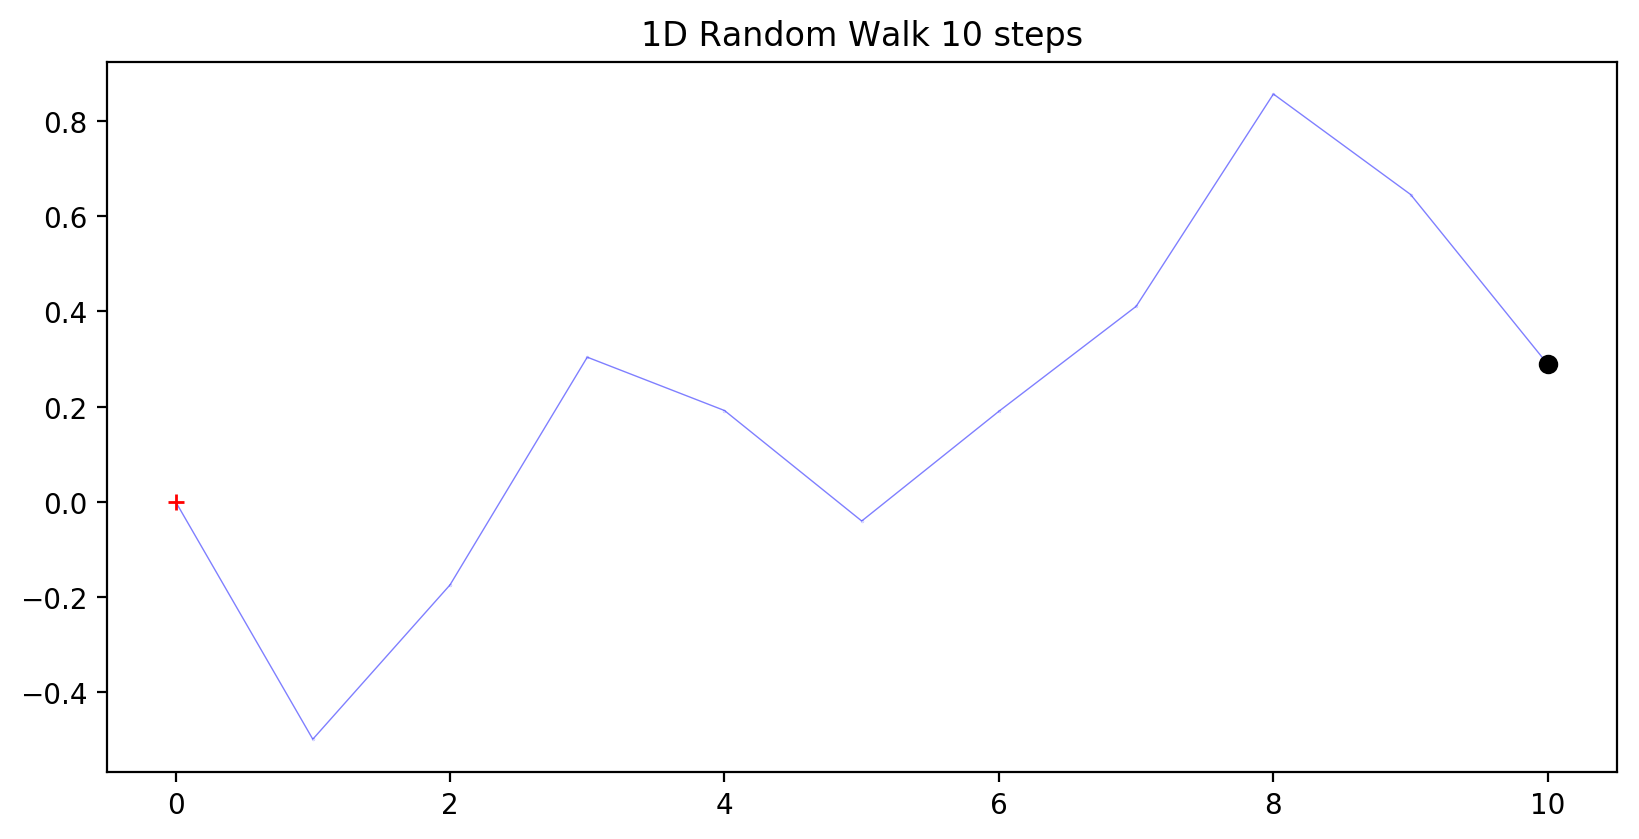

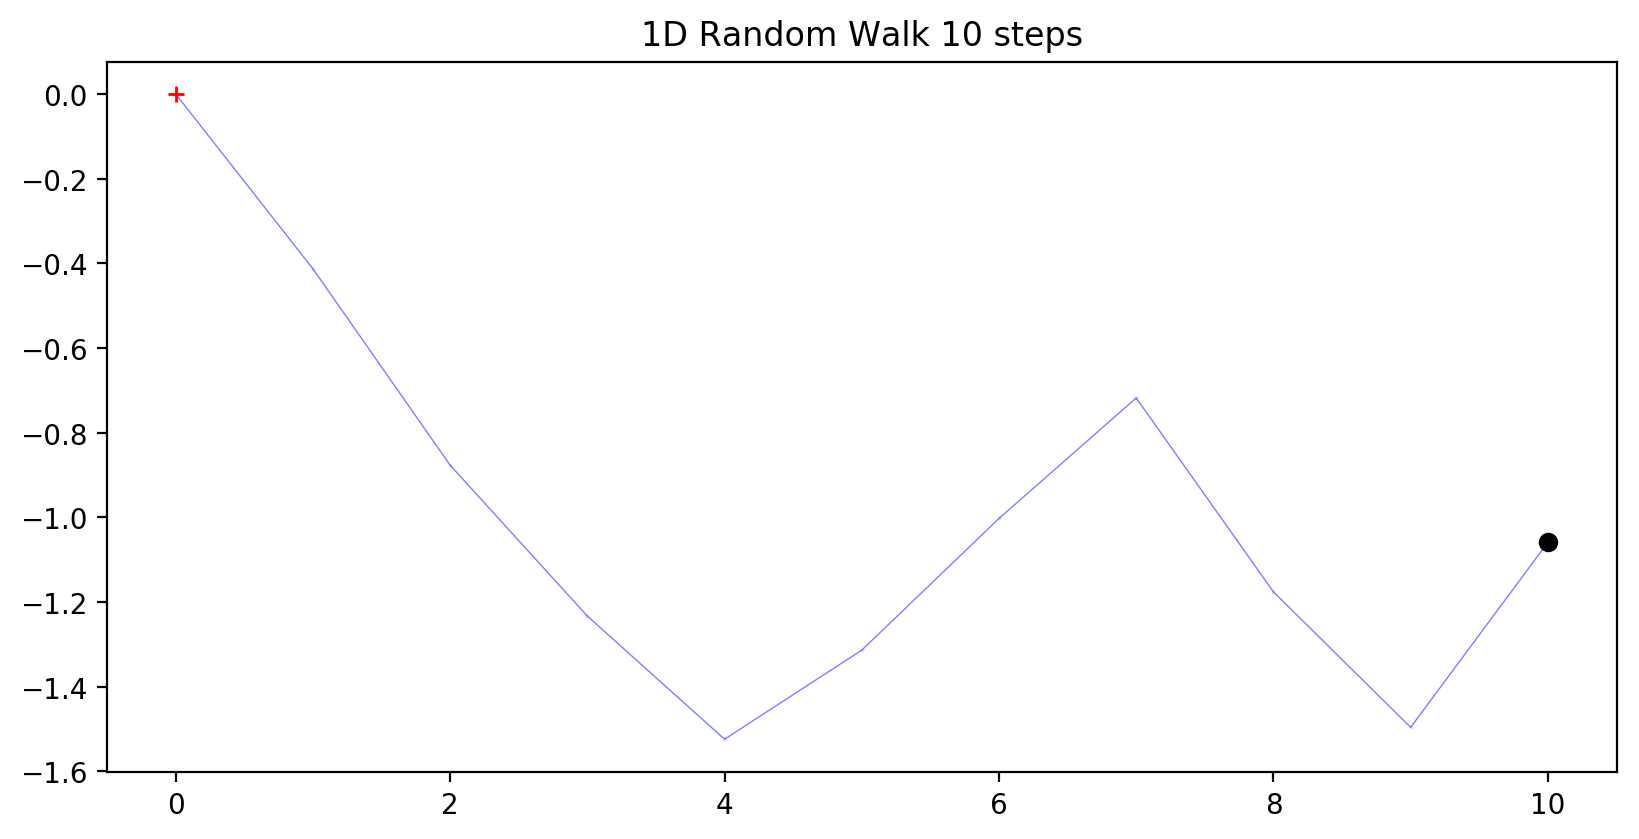

In [3]:
randomWalk(10,1)
randomWalk(10,1)
randomWalk(10,1)

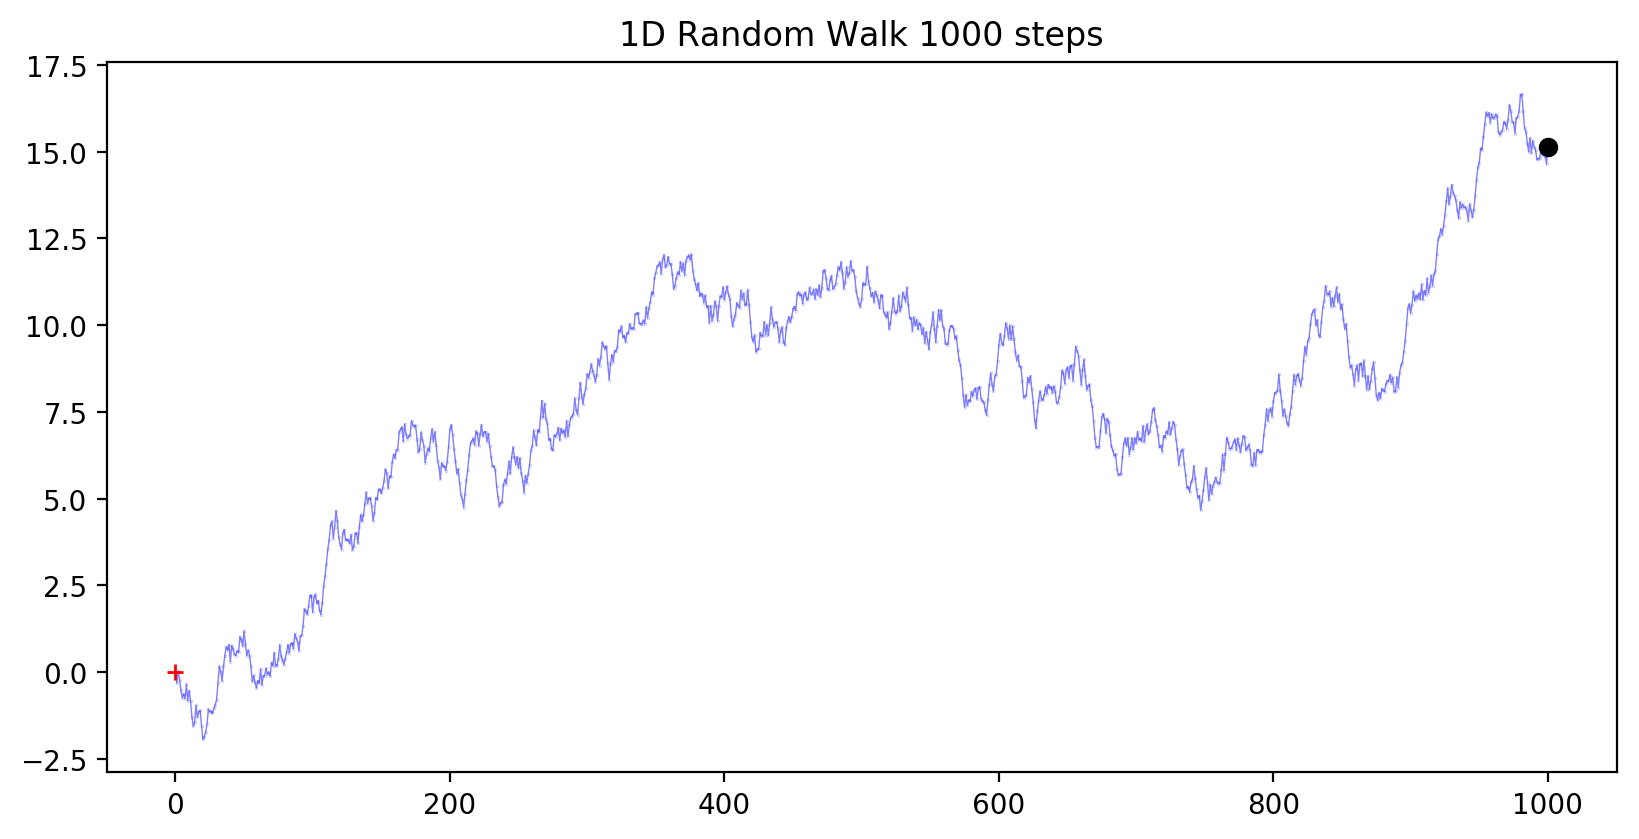

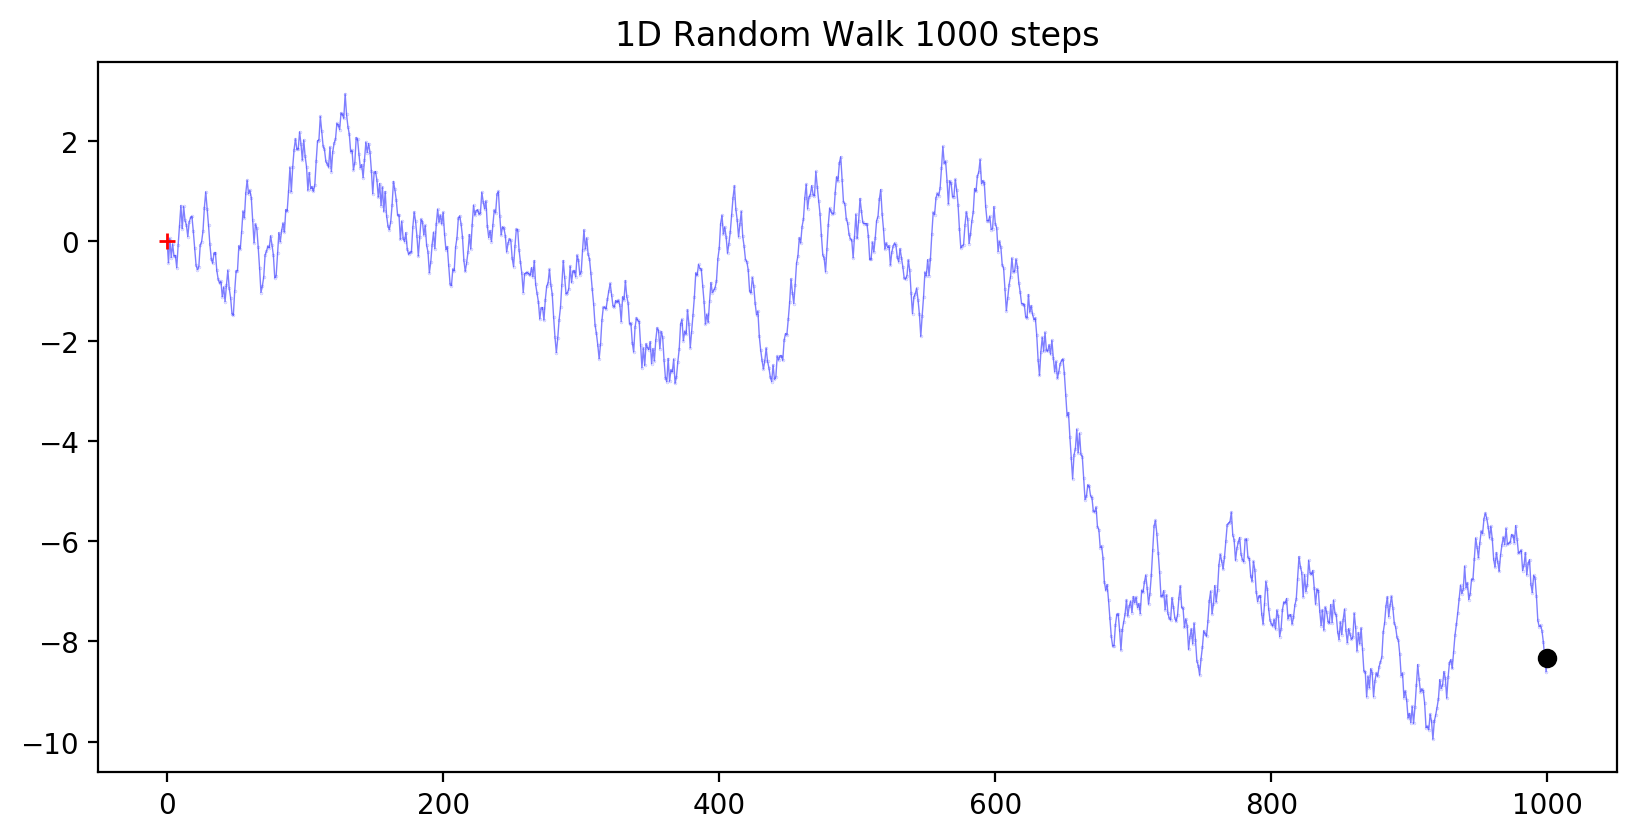

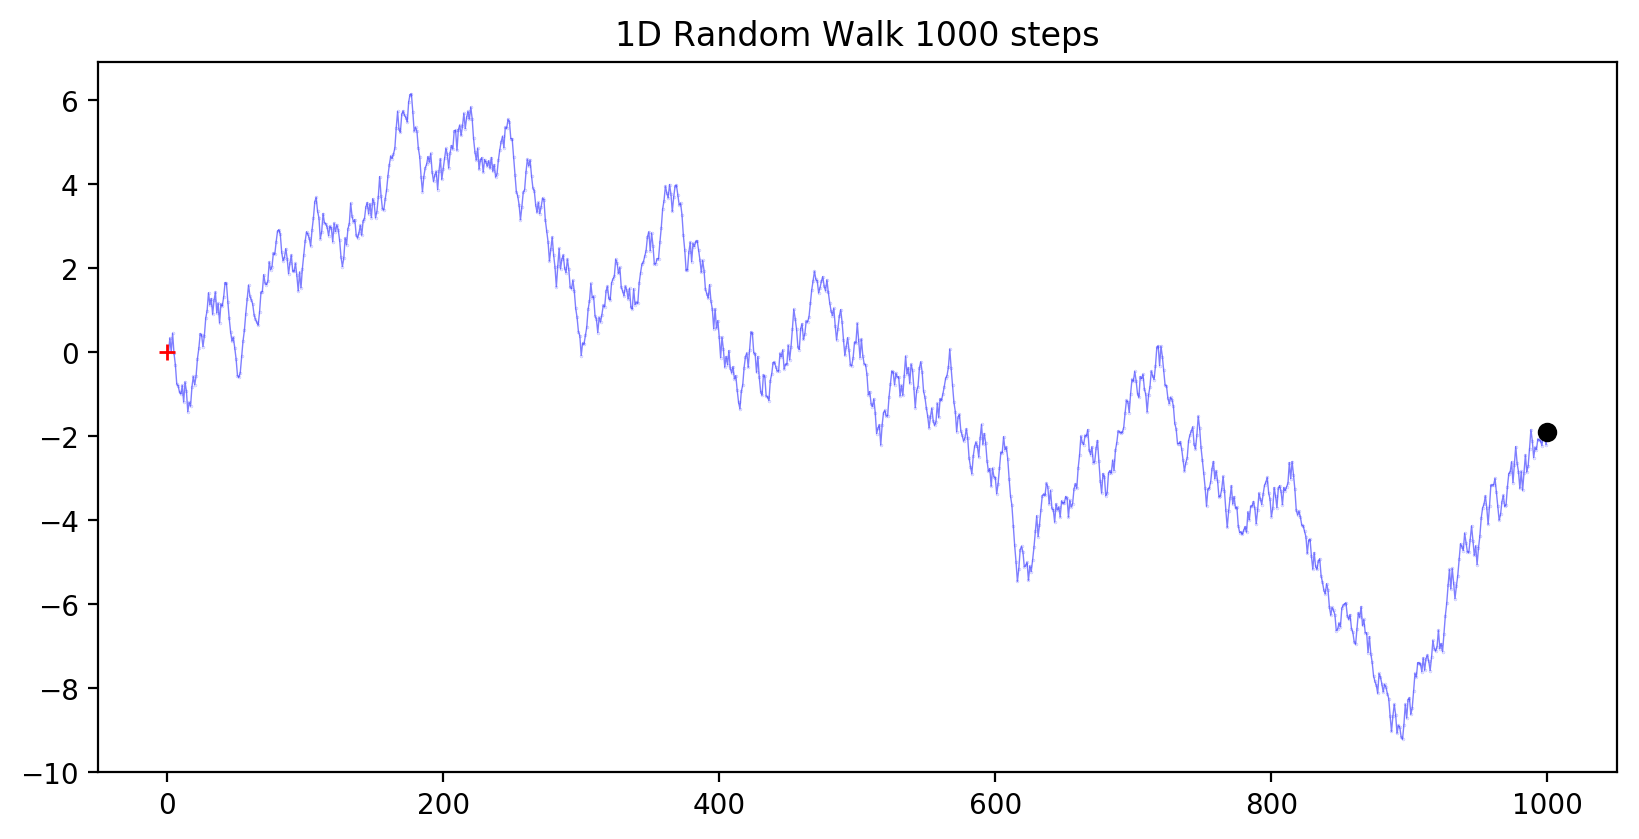

In [4]:
randomWalk(1000,1)
randomWalk(1000,1)
randomWalk(1000,1)

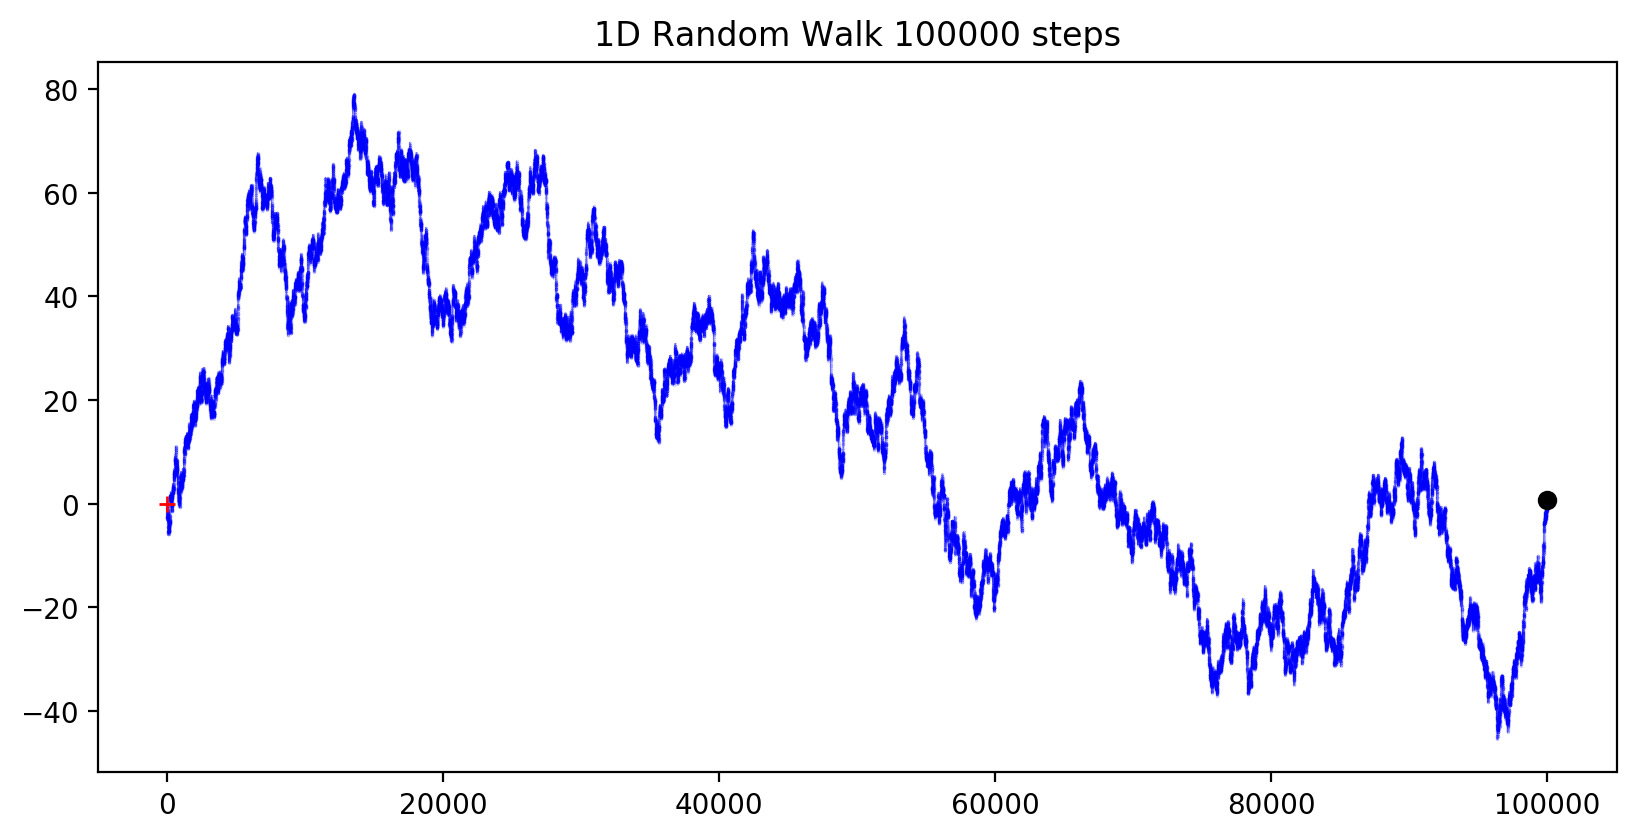

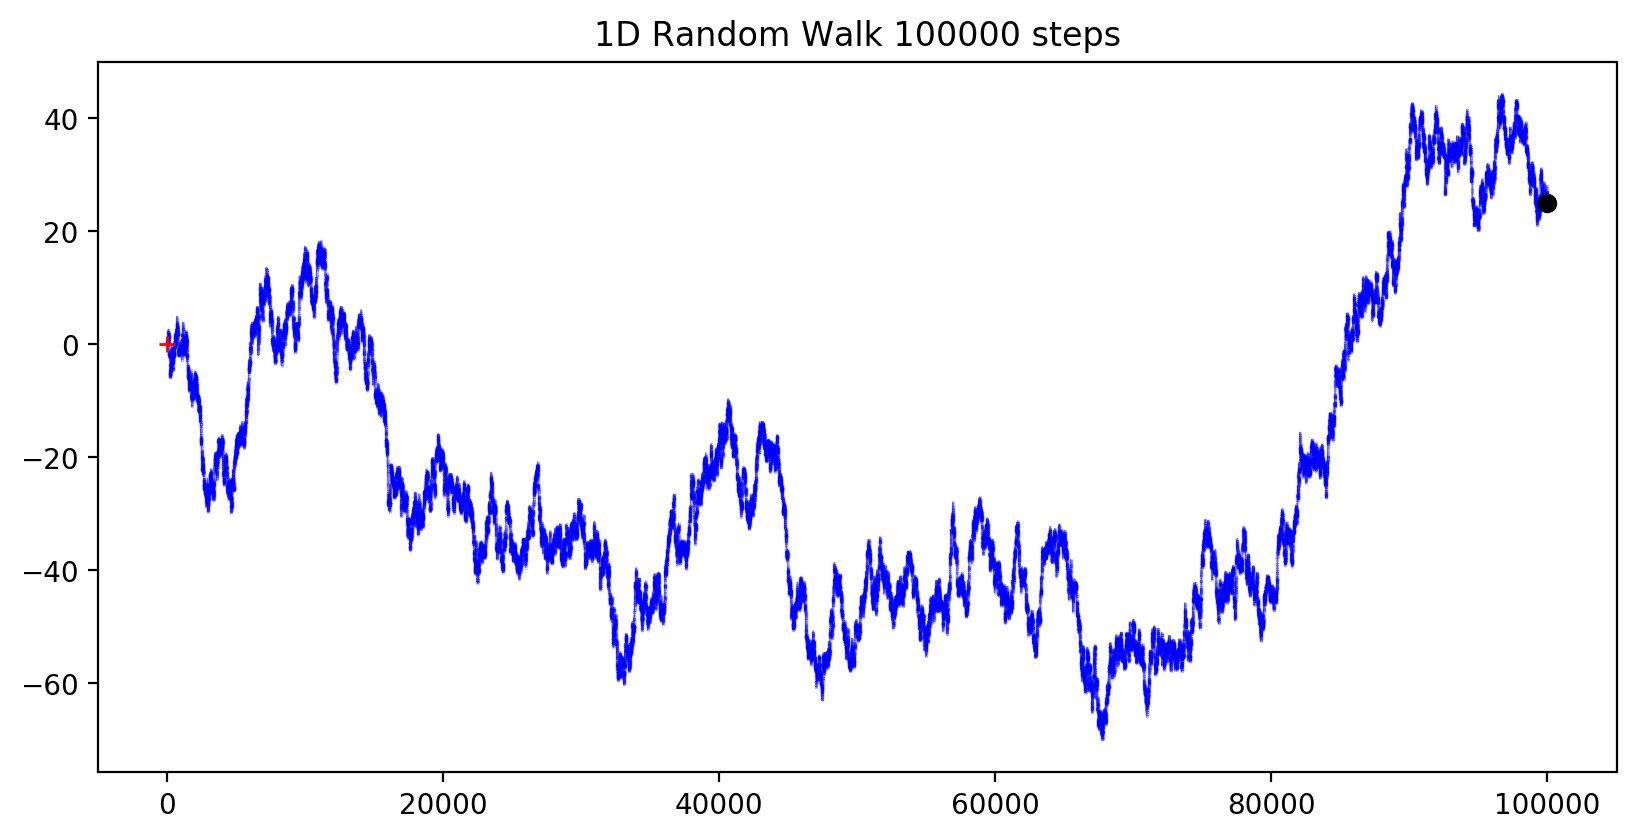

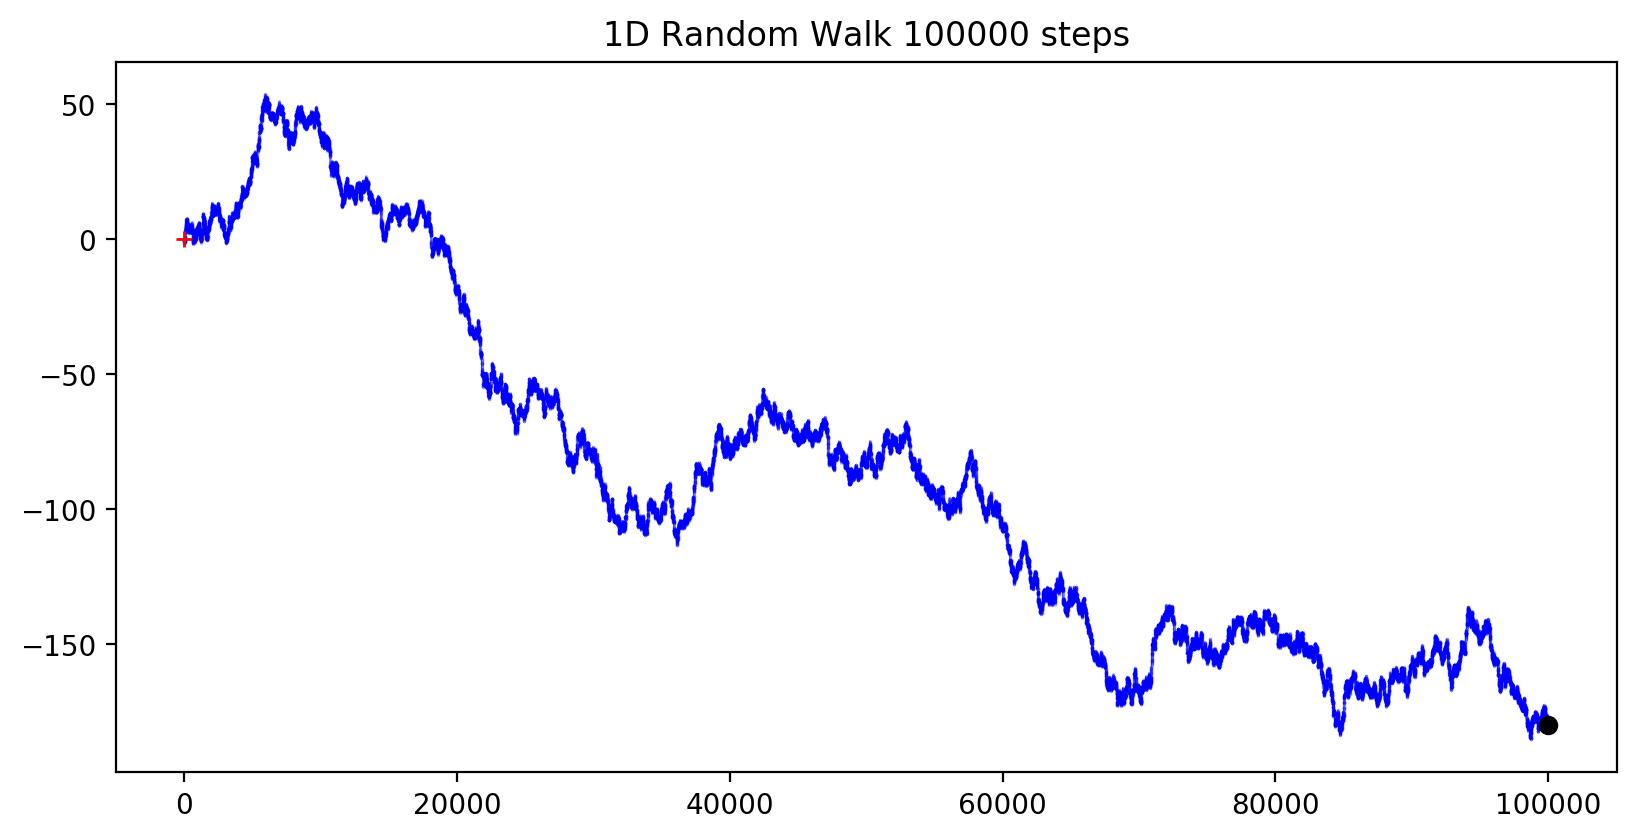

In [5]:
randomWalk(100000,1)
randomWalk(100000,1)
randomWalk(100000,1)

simulação para 2 dimensões

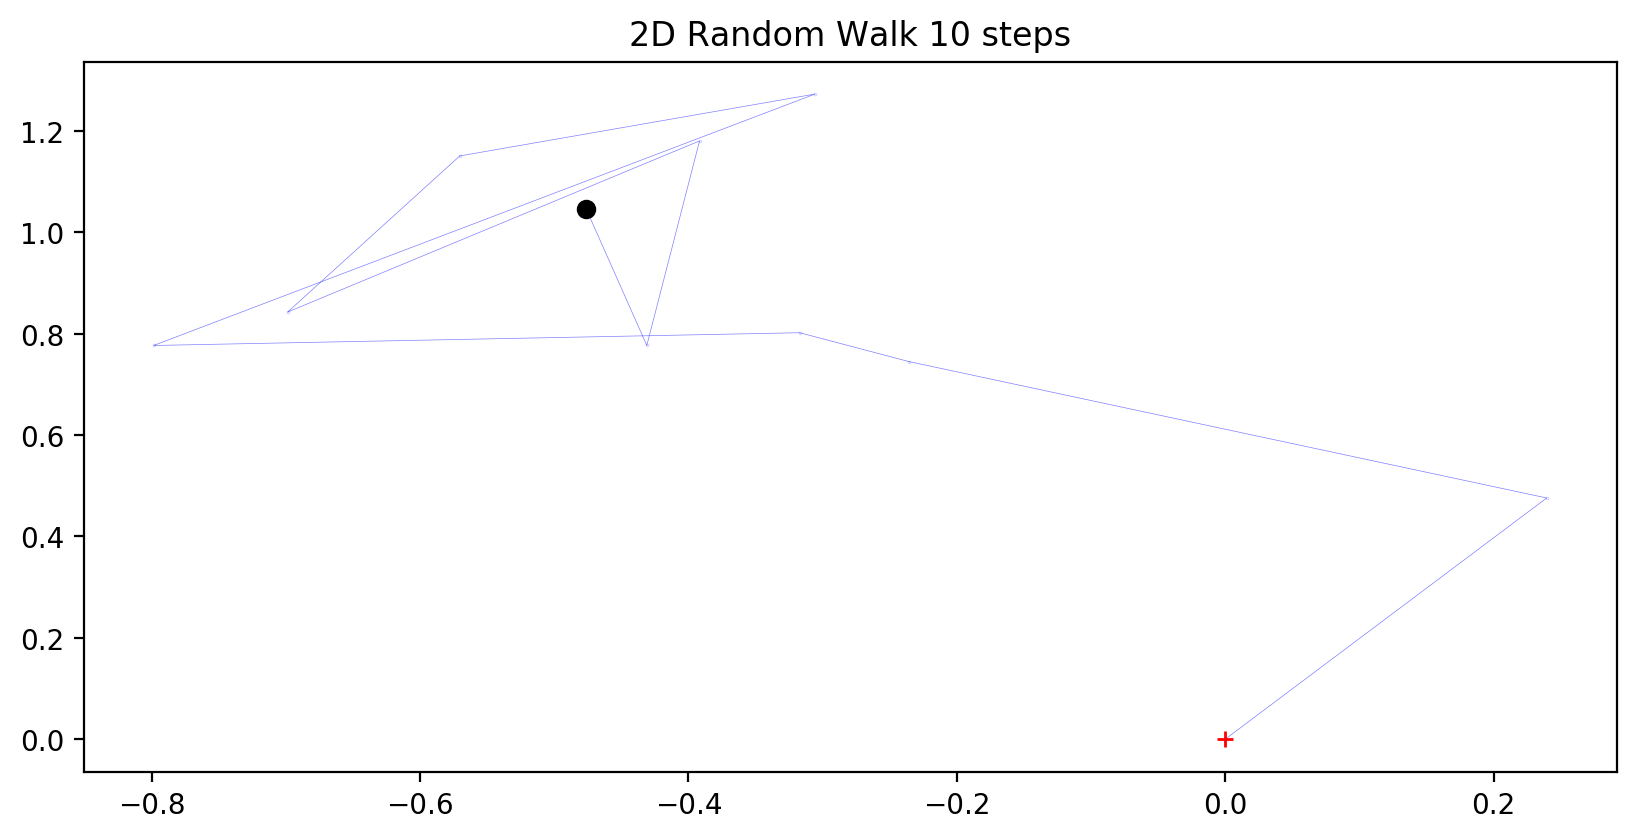

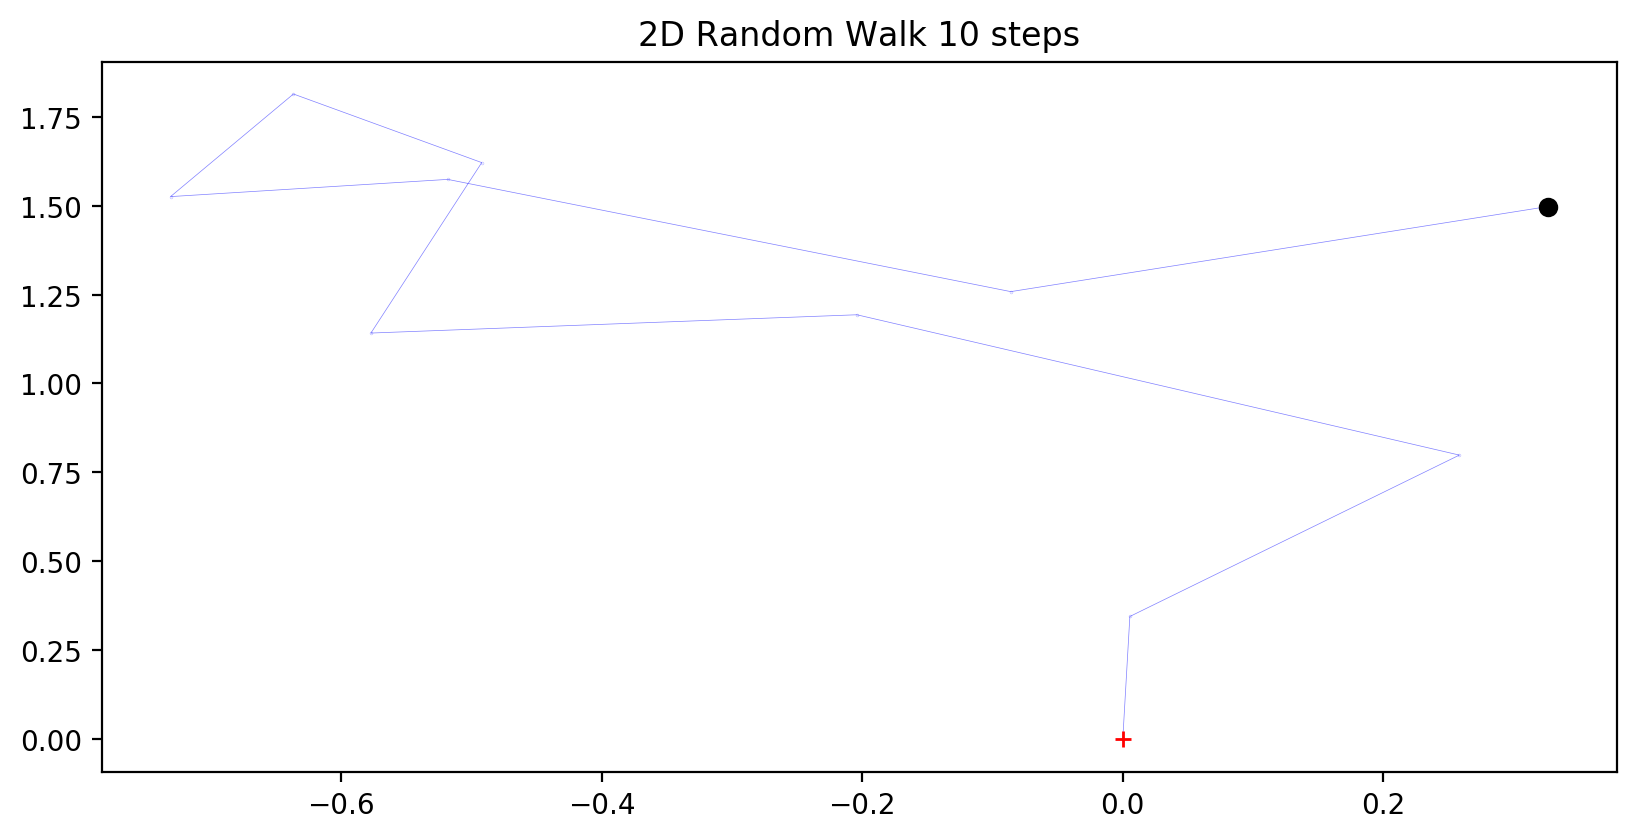

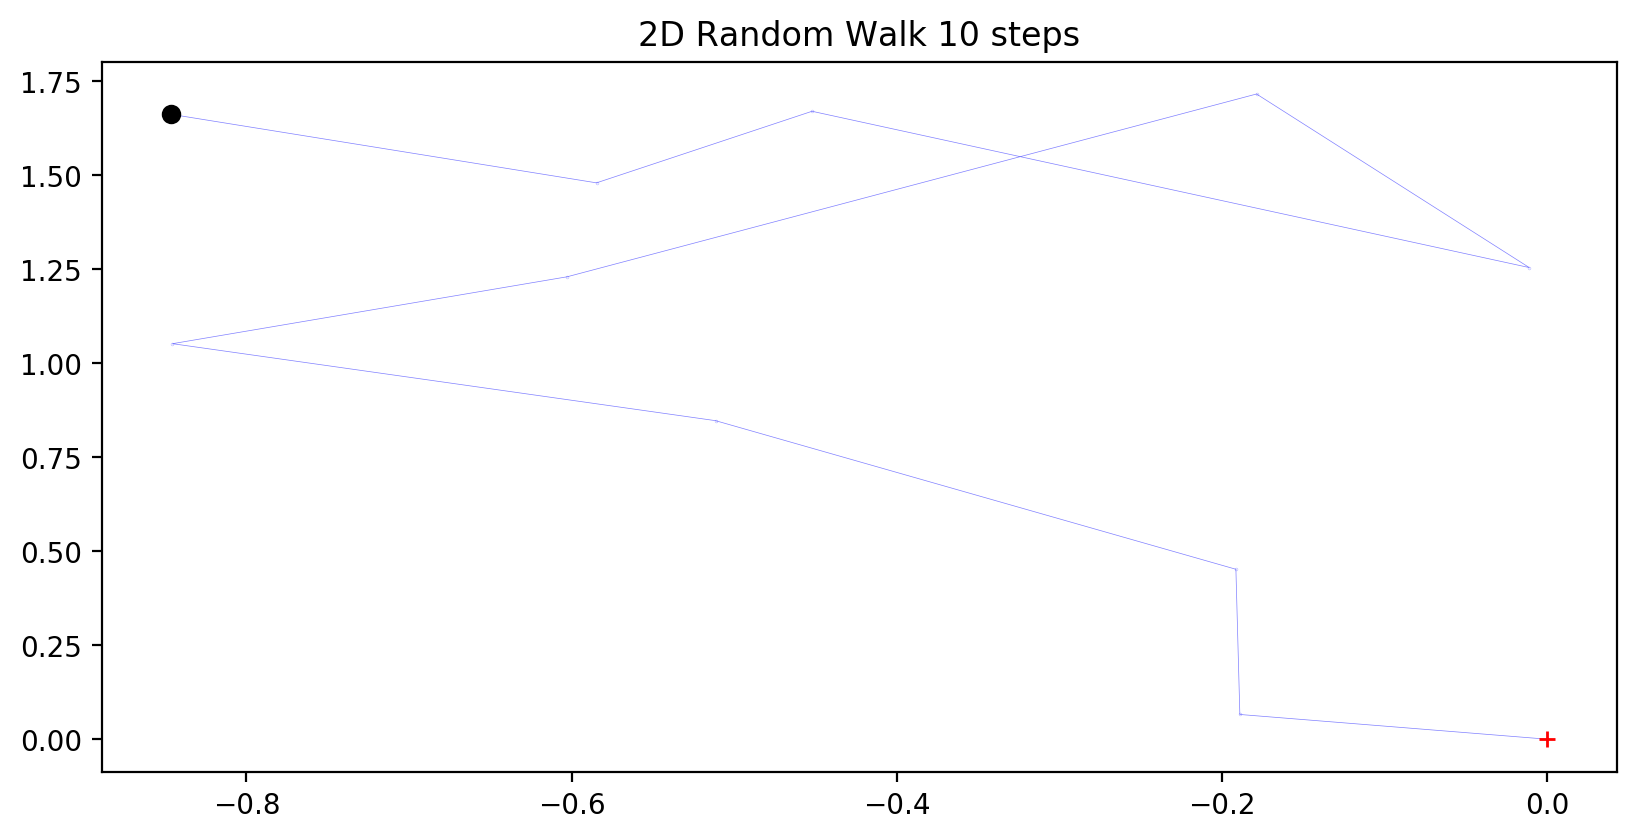

In [6]:
randomWalk(10,2) 
randomWalk(10,2) 
randomWalk(10,2) 

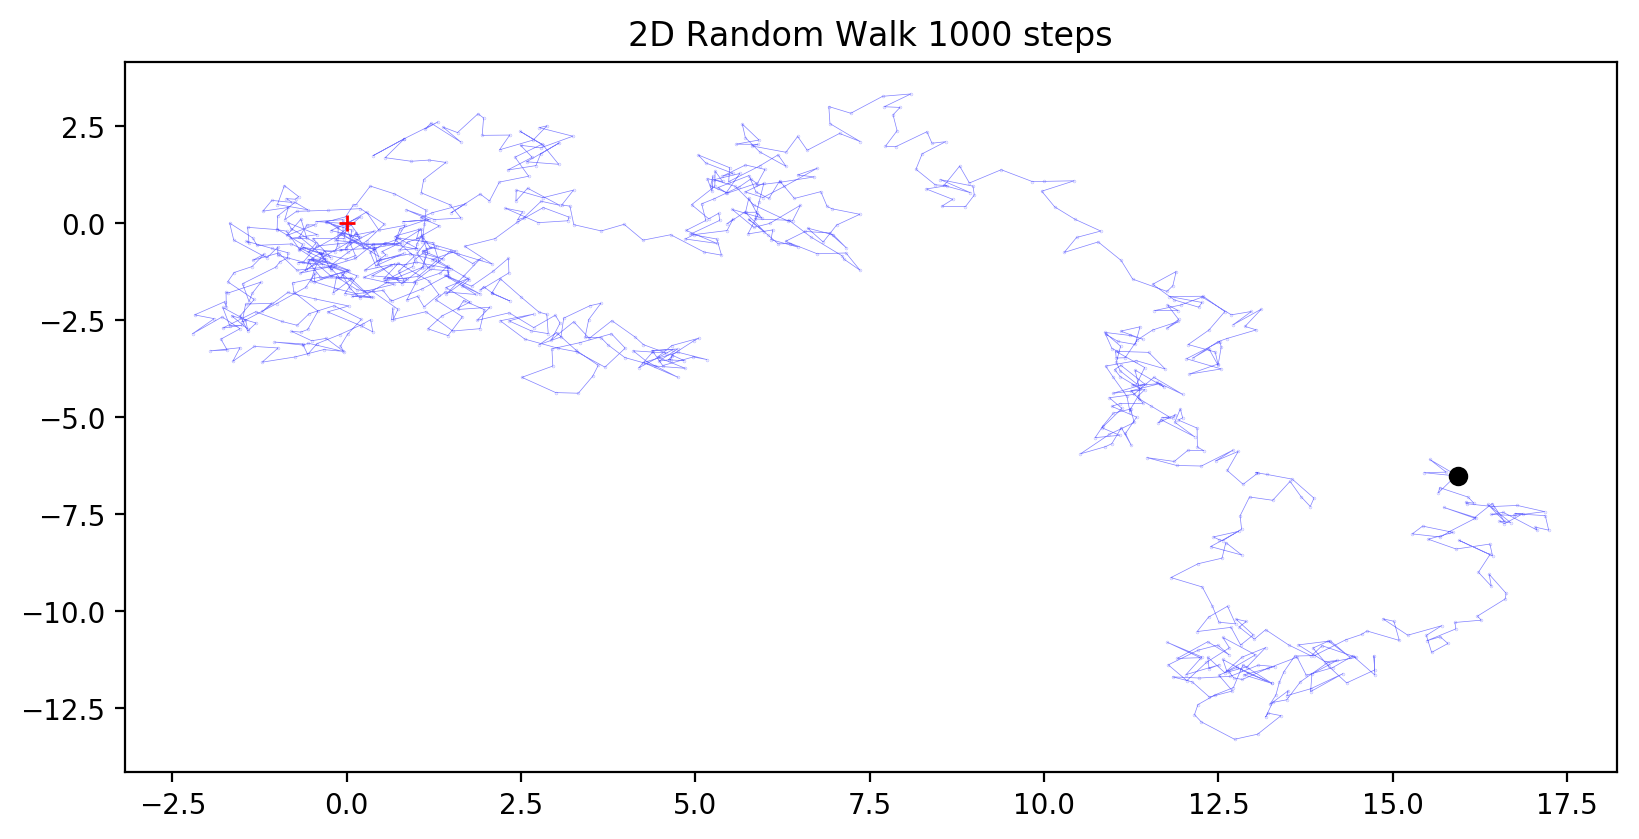

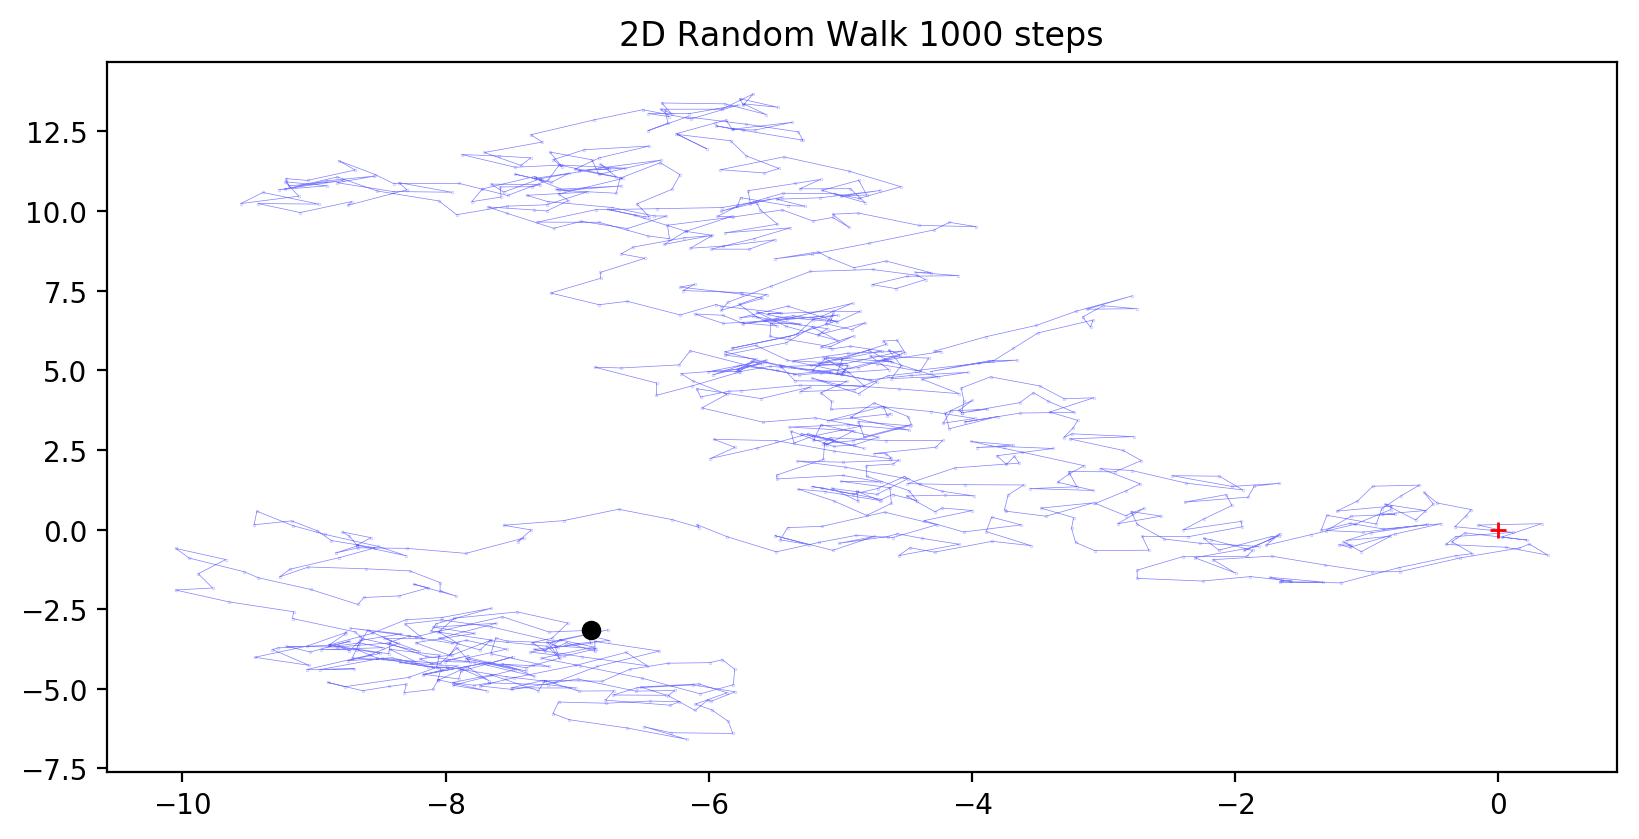

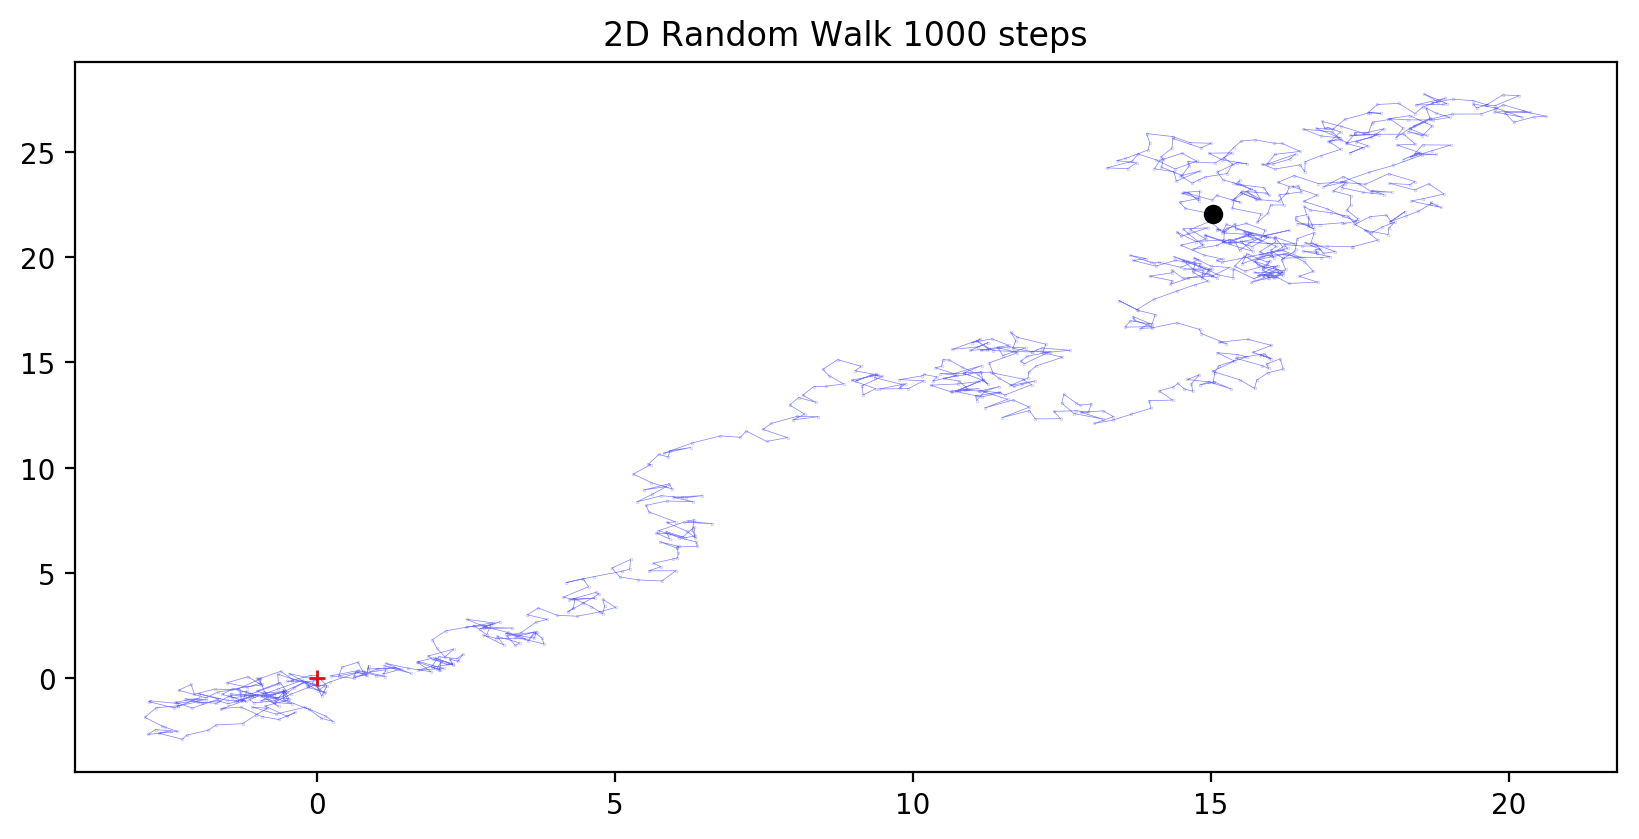

In [7]:
randomWalk(1000,2)
randomWalk(1000,2)
randomWalk(1000,2)

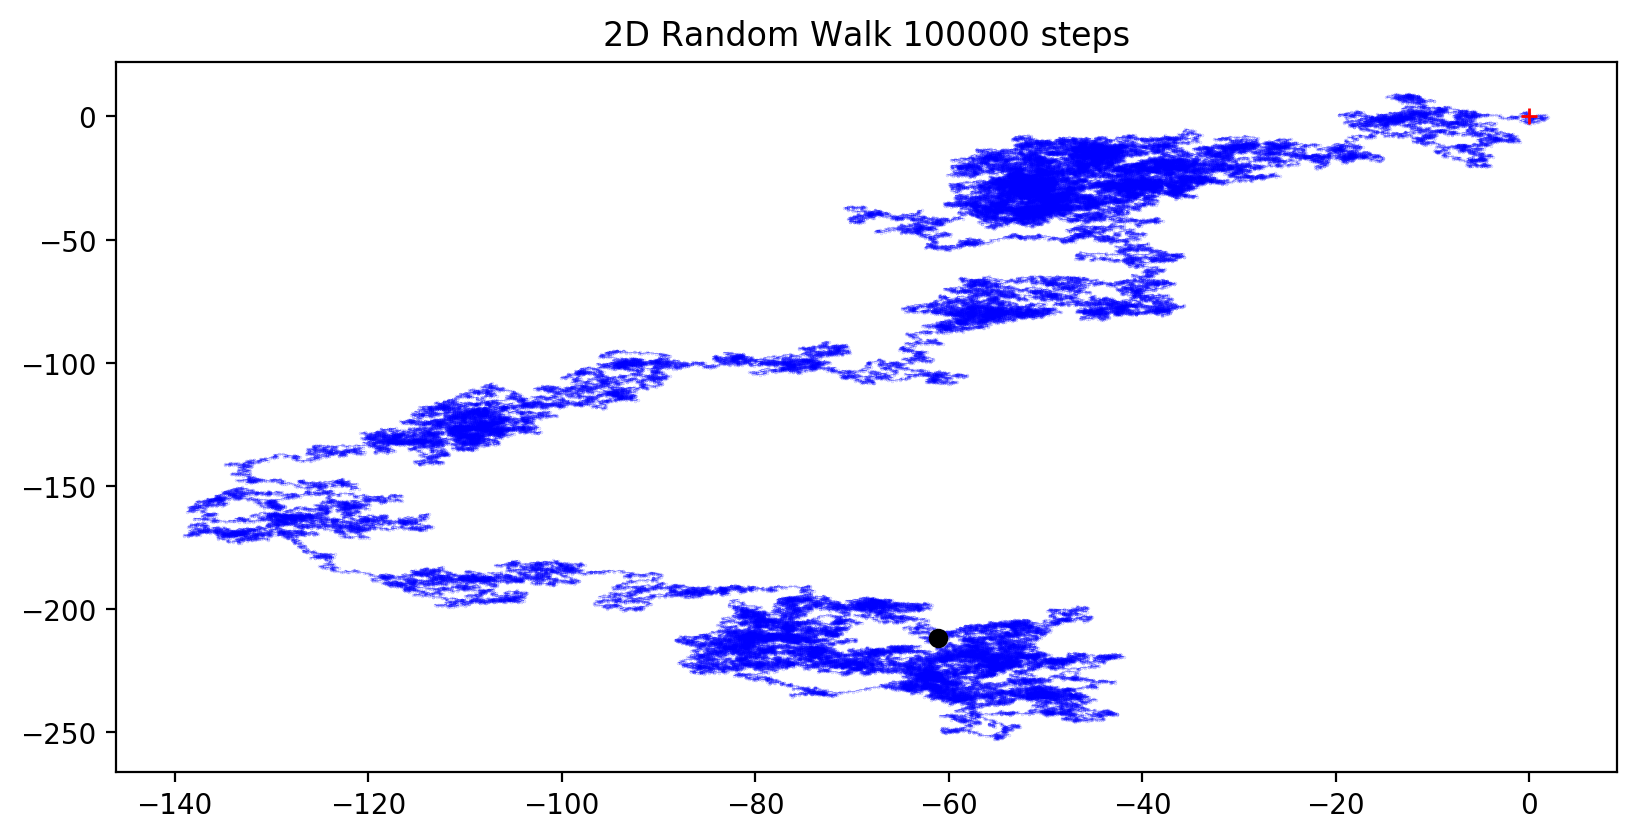

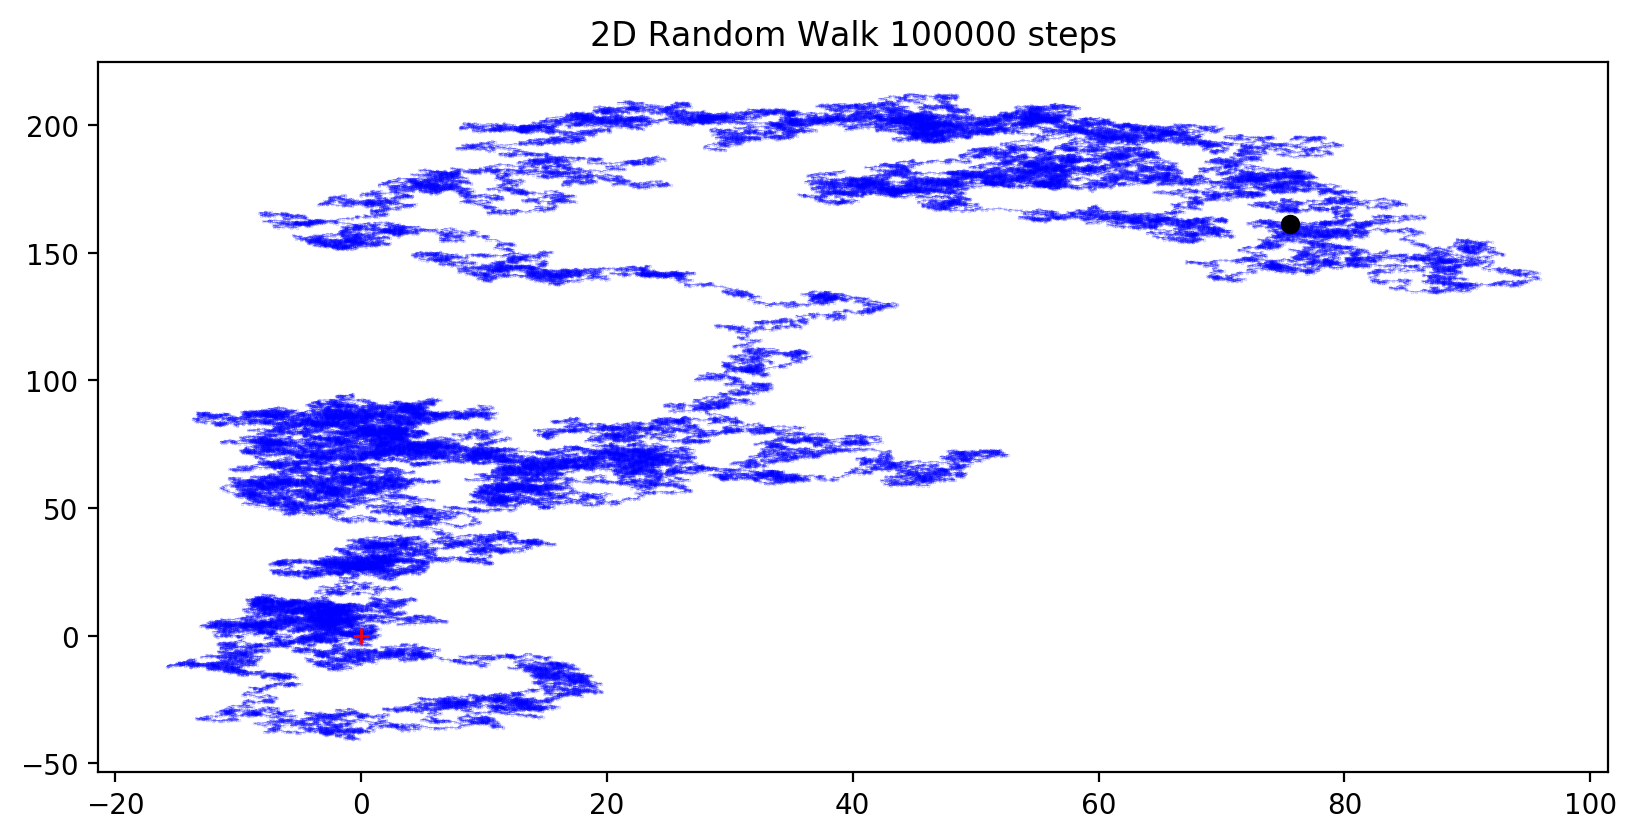

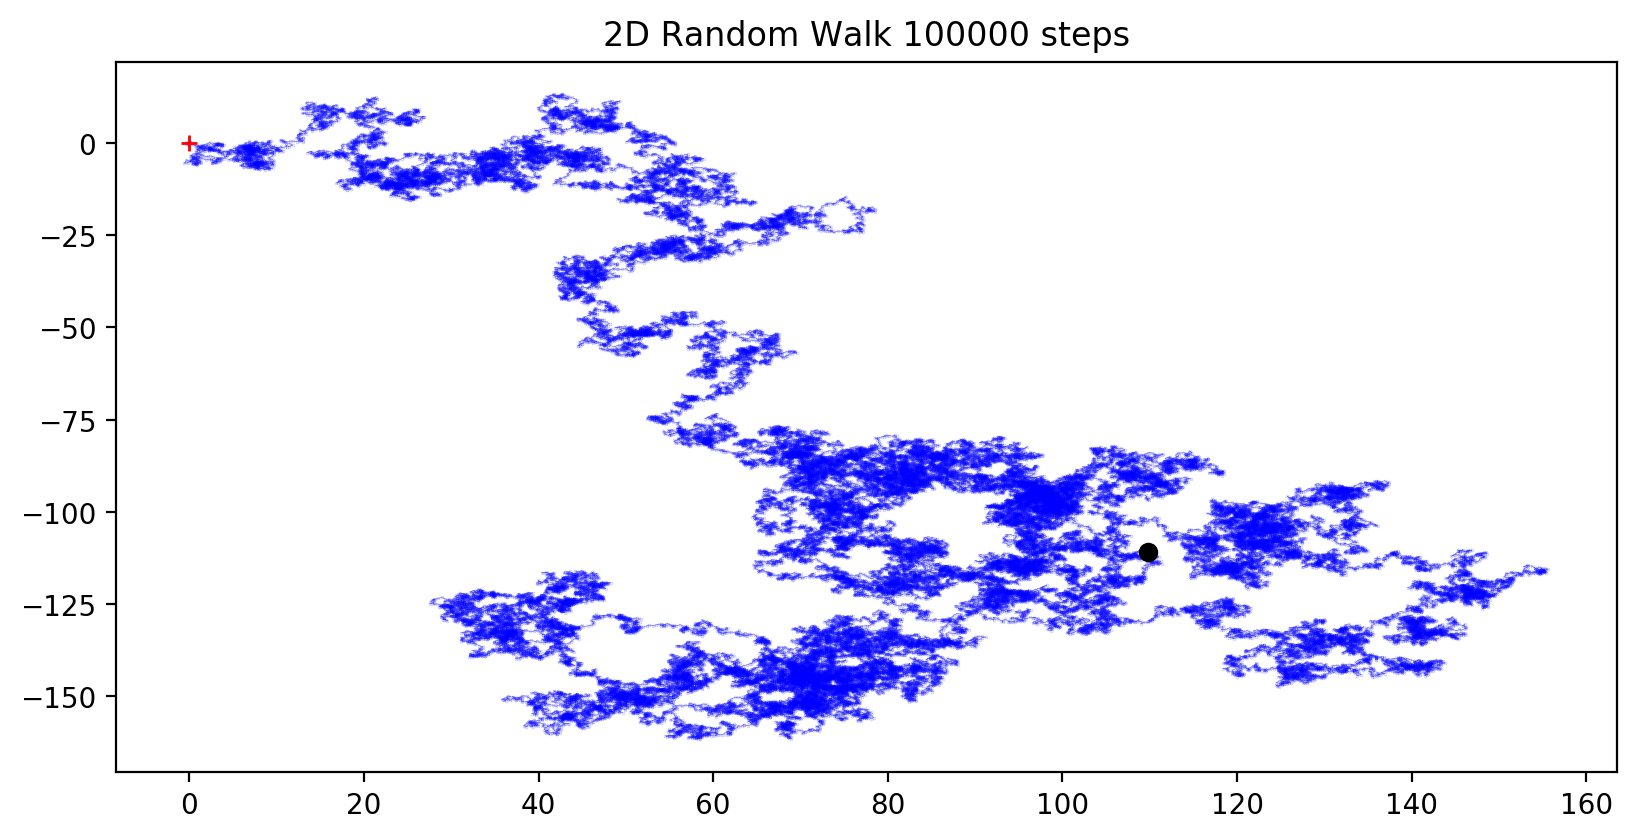

In [8]:
randomWalk(100000,2)
randomWalk(100000,2)
randomWalk(100000,2)

Se você multiplicar o número de passo por 100, a distância final da caminhada aumenta por cerca de 10 vezes?

Notoriamente, é esperado, como visto em aula, que a caminhada é, em média, a raiz do número de passos. Para provar esse fato teriamos que gerar varias caminhadas e ver a média da distancia final que ela percorreu. Mas de acordo com os gráficos gerados em 1 dimensão podemos observar que a variação do eixo y se aproxima bastante de 10 vezes de acordo com o aumento de 100 vezes os passou. Ou até mesmo nos gráficos de 2 dimensões que seguem o mesmo padrão tanto pro eixo x quanto o eixo y. 

Em uma prova formal deveríamos, como realizado no próximo tópico, fazer a distribuição para caminhadas de 10 steps que aparenta um círculo cujo raio(distancia dos pontos da origen (0,0)) médio é x. A partir disso deveriamos plotar um gráfico com 1000 passos e verificar se o raio é próximo de 10x o anterior. 


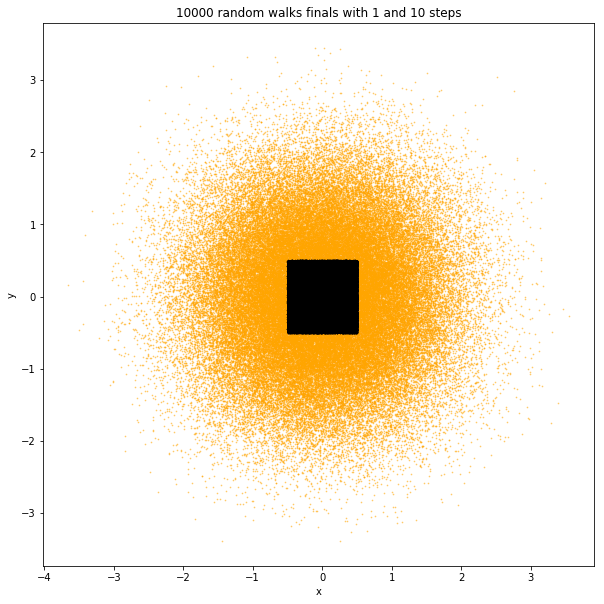

In [9]:
finalRandomWalk()

usando a fórmula ro(x)= exp(-(x*x)/(2*delta*delta) / (sqrt(2pi)delta)   sendo delta=sqrt(n)a e o intervalo (-3delta,3delta)

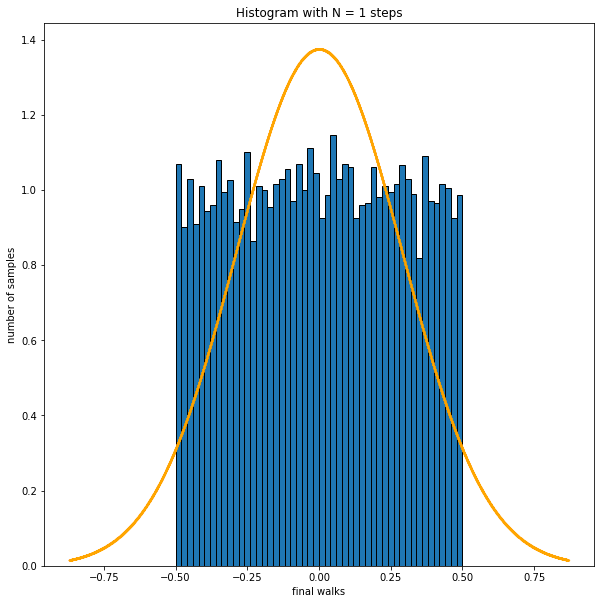

In [10]:
Histogram(1)

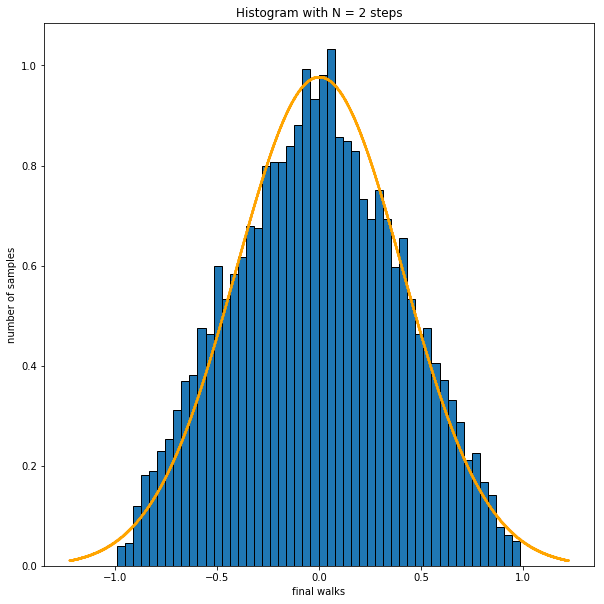

In [11]:
Histogram(2)

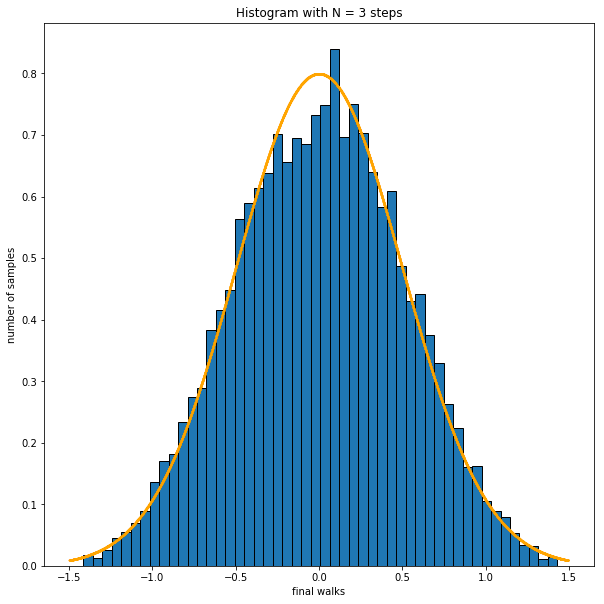

In [12]:
Histogram(3)

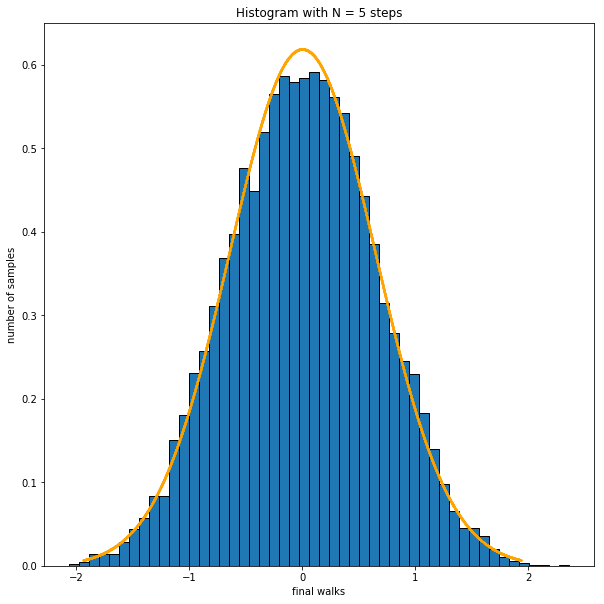

In [13]:
Histogram(5)

Quão rápido a distribuição Gaussiana se torna uma boa aproximação para uma caminhada aleatória?

É bem fácil perceber que rapidamente a distribuição Gaussiana se apróxima da distribuição da caminhada aleatória. Podemos perceber que com N = 2, o histograma começa a tomar a forma da curva normal e quando chega a 5, está bem próxima da real. No entanto, é esperado que essa disribuição é real quando N tende a infinito o que já não é viável devido ao esforço computacional.